In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas_datareader as pdr 
from matplotlib import rcParams
import seaborn as sb 
import yfinance as yf 
sb.set()

In [3]:
amzn = yf.download('AMZN', '2016-06-06', '2023-11-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
amzn.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-25,126.040001,126.339996,120.790001,121.389999,121.389999,74577500
2023-10-26,120.629997,121.639999,118.349998,119.570000,119.570000,100419500
2023-10-27,126.199997,130.020004,125.519997,127.739998,127.739998,125309300
2023-10-30,129.720001,133.000000,128.559998,132.710007,132.710007,72485500
2023-10-31,132.750000,133.570007,131.710007,133.089996,133.089996,51589400


In [5]:
amzn.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1.865000e+03
mean,103.491797,104.699655,102.161571,103.445505,103.445505,8.022123e+07
std,42.825893,43.382136,42.215003,42.770390,42.770390,3.883959e+07
min,34.600498,34.841000,34.105999,34.568001,34.568001,1.762600e+07
25%,75.975502,76.900002,74.750000,75.614502,75.614502,5.467800e+07
50%,95.557503,96.540001,94.457497,95.385002,95.385002,6.878600e+07
75%,140.949997,143.600006,138.929504,140.570007,140.570007,9.338200e+07
max,187.199997,188.654007,184.839493,186.570496,186.570496,3.313000e+08


In [6]:
amzn_close = amzn['Close']
amzn_return = round(np.log(amzn_close / amzn_close.shift(1)) * 100, 2)
amzn_return.dropna(inplace=True)
amzn_return.head()

Date
2016-06-07   -0.41
2016-06-08    0.40
2016-06-09    0.14
2016-06-10   -1.35
2016-06-13   -0.37
Name: Close, dtype: float64

<Axes: xlabel='Date'>

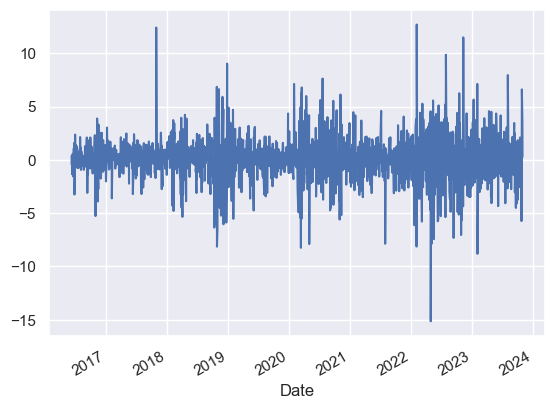

In [7]:
amzn_return.plot()

<Axes: xlabel='Date'>

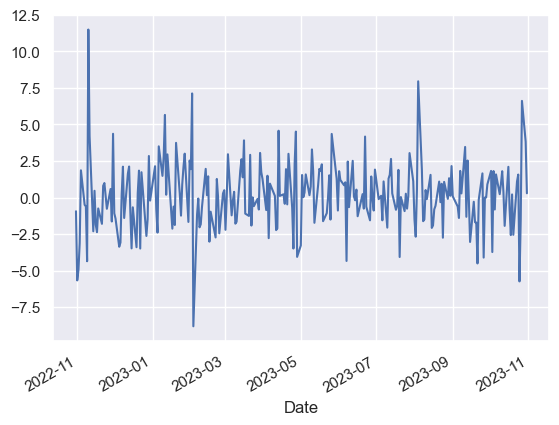

In [8]:
# Only Last Year's plot
amzn_return[-252:].plot()

In [9]:
from scipy import stats

In [10]:
n, minmax, mean, var, skew, kurt = stats.describe(amzn_return)
minimum, maximum = minmax
std = var ** 0.5

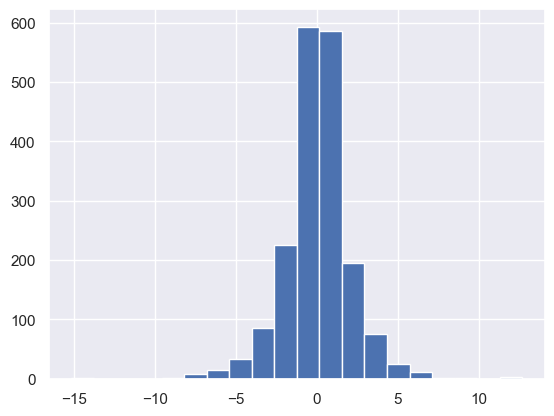

In [11]:
plt.hist(amzn_return, bins=20);

In [12]:
amzn_return.describe()

count    1864.000000
mean        0.069630
std         2.081984
min       -15.140000
25%        -0.872500
50%         0.120000
75%         1.110000
max        12.690000
Name: Close, dtype: float64

In [13]:
# Generate Random Numbers that reflect a Normal Distribution
from scipy.stats import norm
x = norm.rvs(mean, std, n)

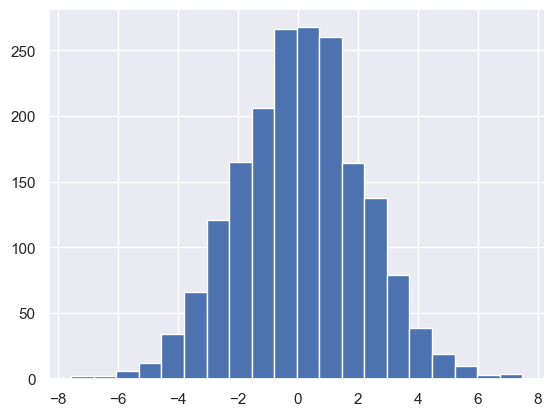

In [14]:
plt.hist(x, bins=20);

In [17]:
# Statistical Test to determine if data is normal
x_test = stats.kurtosistest(x)
amzn_test = stats.kurtosistest(amzn_return)
print(f'{"Test Statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"*30}')
print(f'x:{x_test[0]:>17.2f}{x_test[1]:16.4f}')
print(f"AMZN: {amzn_test[0]:13.2f}{amzn_test[1]:16.4f}")

Test Statistic              p-value
     ------------------------------
x:             1.40          0.1630
AMZN:         14.65          0.0000
